In [2]:
#데이터 구성 패키지
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
#scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler


#데이터 분할
from sklearn.model_selection import train_test_split
#LightGBM 패키지 불러오기
from lightgbm import LGBMClassifier

#변수 중요도 확인: F1 점수 기준
from lightgbm import plot_importance
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns

from subprocess import call
from IPython.display import Image
#로지스틱 회귀
from statsmodels.api import Logit
#분류모델 평가함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score,recall_score, f1_score,roc_curve,auc
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE
import seaborn as sns

import scipy.stats as stats

from scipy.stats import chi2_contingency

%matplotlib inline
matplotlib.rc('font',family = 'Noto Sans CJK JP')
#-기호 false다
matplotlib.rc('axes',unicode_minus = False)

In [2]:
data  = pd.read_csv("control_para.csv")
data

,Unnamed: 0,No_Die,process,type,Temp_OXid,ppm,Pressure,Oxid_time,process 2,N2_HMDS,...,Temp_implantation,Furance_Temp,RTA_Temp,process4.1,Target,Lot_Num,Wafer_Num,Datetime,path,short_path
0,0,NOLSM325131325,Oxidation,dry,1214.307948,26.69,0.203,120,Photo,17.367,...,103.433,854,154,Inspect,141,13,28,01-03-2022,21111,2111
1,1,NOLSM326132326,Oxidation,dry,978.110792,30.86,0.217,137,Photo,16.090,...,105.552,895,156,Inspect,55,13,29,01-03-2022,21122,2112
2,2,NOLSM327133327,Oxidation,dry,1176.019149,31.07,0.218,116,Photo,19.026,...,102.598,898,152,Inspect,96,13,30,01-03-2022,21133,2113
3,3,NOLSM328134328,Oxidation,dry,933.442733,31.04,0.196,143,Photo,18.891,...,102.963,879,155,Inspect,105,13,31,01-03-2022,21111,2111
4,4,NOLSM329135329,Oxidation,wet,1140.598752,31.37,0.215,76,Photo,13.788,...,101.419,882,155,Inspect,79,13,32,01-03-2022,21122,2112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,1663,NOLSM8483211,Oxidation,wet,1275.182502,45.10,0.214,21,Photo,16.029,...,101.503,868,152,Inspect,78,32,11,28-02-2022,33333,3333
1664,1664,NOLSM8493212,Oxidation,wet,1268.105427,45.07,0.215,22,Photo,17.587,...,101.061,867,152,Inspect,42,32,12,28-02-2022,11133,1113
1665,1665,NOLSM8503213,Oxidation,wet,1279.160563,45.12,0.214,21,Photo,16.445,...,101.506,868,152,Inspect,42,32,13,28-02-2022,11222,1122
1666,1666,NOLSM8513214,Oxidation,wet,1272.804948,45.34,0.213,20,Photo,15.306,...,101.360,868,152,Inspect,24,32,14,28-02-2022,11311,1131


In [3]:
data = data.drop(['Unnamed: 0'], axis=1)
data

,No_Die,process,type,Temp_OXid,ppm,Pressure,Oxid_time,process 2,N2_HMDS,pressure_HMDS,...,Temp_implantation,Furance_Temp,RTA_Temp,process4.1,Target,Lot_Num,Wafer_Num,Datetime,path,short_path
0,NOLSM325131325,Oxidation,dry,1214.307948,26.69,0.203,120,Photo,17.367,15.006,...,103.433,854,154,Inspect,141,13,28,01-03-2022,21111,2111
1,NOLSM326132326,Oxidation,dry,978.110792,30.86,0.217,137,Photo,16.090,15.059,...,105.552,895,156,Inspect,55,13,29,01-03-2022,21122,2112
2,NOLSM327133327,Oxidation,dry,1176.019149,31.07,0.218,116,Photo,19.026,14.930,...,102.598,898,152,Inspect,96,13,30,01-03-2022,21133,2113
3,NOLSM328134328,Oxidation,dry,933.442733,31.04,0.196,143,Photo,18.891,14.947,...,102.963,879,155,Inspect,105,13,31,01-03-2022,21111,2111
4,NOLSM329135329,Oxidation,wet,1140.598752,31.37,0.215,76,Photo,13.788,14.820,...,101.419,882,155,Inspect,79,13,32,01-03-2022,21122,2112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,NOLSM8483211,Oxidation,wet,1275.182502,45.10,0.214,21,Photo,16.029,15.005,...,101.503,868,152,Inspect,78,32,11,28-02-2022,33333,3333
1664,NOLSM8493212,Oxidation,wet,1268.105427,45.07,0.215,22,Photo,17.587,14.949,...,101.061,867,152,Inspect,42,32,12,28-02-2022,11133,1113
1665,NOLSM8503213,Oxidation,wet,1279.160563,45.12,0.214,21,Photo,16.445,14.978,...,101.506,868,152,Inspect,42,32,13,28-02-2022,11222,1122
1666,NOLSM8513214,Oxidation,wet,1272.804948,45.34,0.213,20,Photo,15.306,15.050,...,101.360,868,152,Inspect,24,32,14,28-02-2022,11311,1131


In [4]:
data['type'] = data['type'].replace({'dry': 1, 'wet': 0})
data.head()

,No_Die,process,type,Temp_OXid,ppm,Pressure,Oxid_time,process 2,N2_HMDS,pressure_HMDS,...,Temp_implantation,Furance_Temp,RTA_Temp,process4.1,Target,Lot_Num,Wafer_Num,Datetime,path,short_path
0,NOLSM325131325,Oxidation,1,1214.307948,26.69,0.203,120,Photo,17.367,15.006,...,103.433,854,154,Inspect,141,13,28,01-03-2022,21111,2111
1,NOLSM326132326,Oxidation,1,978.110792,30.86,0.217,137,Photo,16.090,15.059,...,105.552,895,156,Inspect,55,13,29,01-03-2022,21122,2112
2,NOLSM327133327,Oxidation,1,1176.019149,31.07,0.218,116,Photo,19.026,14.930,...,102.598,898,152,Inspect,96,13,30,01-03-2022,21133,2113
3,NOLSM328134328,Oxidation,1,933.442733,31.04,0.196,143,Photo,18.891,14.947,...,102.963,879,155,Inspect,105,13,31,01-03-2022,21111,2111
4,NOLSM329135329,Oxidation,0,1140.598752,31.37,0.215,76,Photo,13.788,14.820,...,101.419,882,155,Inspect,79,13,32,01-03-2022,21122,2112


In [5]:
def Err(x) :
    if x >= 195 :
        return 1
    else :
        return 0
    
data['Error']=data['Target'].apply(Err)

# data.info()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No_Die             1668 non-null   object 
 1   process            1668 non-null   object 
 2   type               1668 non-null   int64  
 3   Temp_OXid          1668 non-null   float64
 4   ppm                1668 non-null   float64
 5   Pressure           1668 non-null   float64
 6   Oxid_time          1668 non-null   int64  
 7   process 2          1668 non-null   object 
 8   N2_HMDS            1668 non-null   float64
 9   pressure_HMDS      1668 non-null   float64
 10  temp_HMDS          1668 non-null   float64
 11  temp_HMDS_bake     1668 non-null   float64
 12  time_HMDS_bake     1668 non-null   float64
 13  spin1              1668 non-null   float64
 14  spin2              1668 non-null   float64
 15  spin3              1668 non-null   float64
 16  photoresist_bake   1668 

# 파이차트

/tmp/ipykernel_2597/1536557351.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


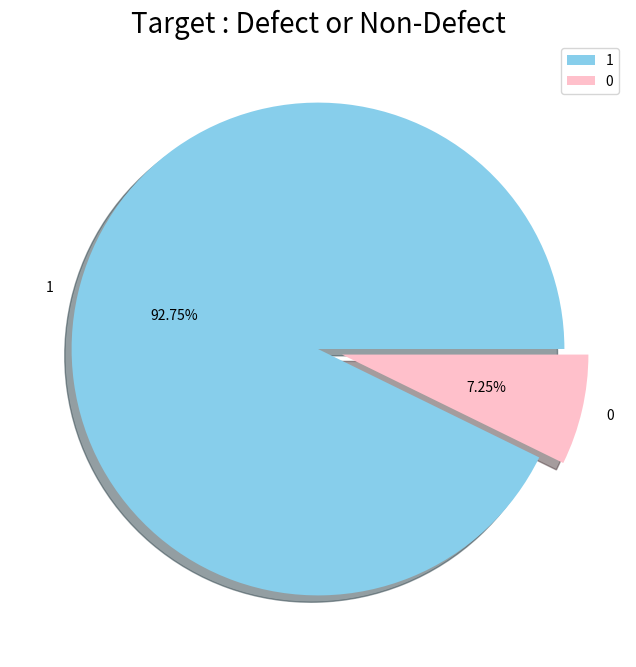

<Axes: >

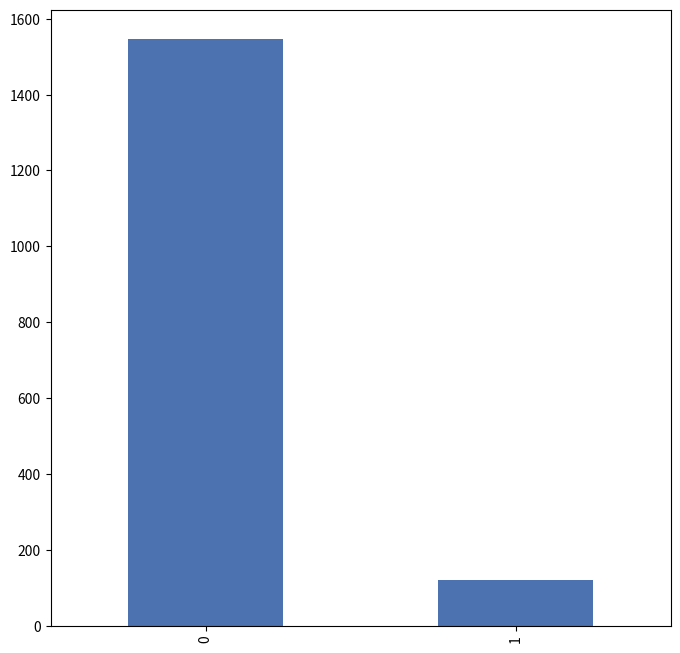

In [7]:
labels = [1, 0]
size = data['Error'].value_counts()
colors = ['skyblue', 'pink']
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels=labels, colors=colors, explode=explode, autopct="%.2f%%", shadow=True)
plt.axis('off')
plt.title('Target : Defect or Non-Defect', fontsize = 20)
plt.legend()
plt.show()
data['Error'].value_counts().plot(kind='bar')

In [8]:
# 모델링할 때, 필요없는 데이터 drop
data = data.drop(["No_Die", "process","process 2","Process 2-1", "Process 3", "process4", "process4.1", "Target", "Lot_Num", "Wafer_Num", "path", "short_path", "Datetime"], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               1668 non-null   int64  
 1   Temp_OXid          1668 non-null   float64
 2   ppm                1668 non-null   float64
 3   Pressure           1668 non-null   float64
 4   Oxid_time          1668 non-null   int64  
 5   N2_HMDS            1668 non-null   float64
 6   pressure_HMDS      1668 non-null   float64
 7   temp_HMDS          1668 non-null   float64
 8   temp_HMDS_bake     1668 non-null   float64
 9   time_HMDS_bake     1668 non-null   float64
 10  spin1              1668 non-null   float64
 11  spin2              1668 non-null   float64
 12  spin3              1668 non-null   float64
 13  photoresist_bake   1668 non-null   float64
 14  temp_softbake      1668 non-null   float64
 15  time_softbake      1668 non-null   float64
 16  Wavelength         1668 

In [9]:
from imblearn.over_sampling import RandomOverSampler
# Train-Test Split (70:30)
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data["Error"], test_size=0.4, random_state=1004)

# Random Oversampling
ros = RandomOverSampler(sampling_strategy='minority', random_state=1004)
x_resampled, y_resampled = ros.fit_resample(data.iloc[:, :-1], data["Error"])
x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(x_resampled, y_resampled, test_size=0.4, random_state=1004)

# 기본 모델로 Gradient Boosting 모델

In [10]:
# 그래디언트 부스팅 모델 생성 : GradientBoostingClassifier
gb_uncust = GradientBoostingClassifier(random_state=1004)
gb_uncust.fit(x_train, y_train)

# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(gb_uncust.score(x_train, y_train)))

# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_uncust.score(x_test, y_test)))

Accuracy on training set: 0.980
Accuracy on test set: 0.954


In [11]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []

# learning rate 학습률 변경
para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr :
    gb = GradientBoostingClassifier(learning_rate=v_learning_rate, random_state=1004)
    gb.fit(x_train, y_train)
    train_accuracy.append(gb.score(x_train, y_train))
    test_accuracy.append(gb.score(x_test, y_test))
    
# 데이터 테이블로 저장
data_accuracy_lr = pd.DataFrame()
data_accuracy_lr["LearningRate"] = para_lr
data_accuracy_lr["TrainAccuracy"] = train_accuracy
data_accuracy_lr["TestAccuracy"] = test_accuracy
data_accuracy_lr["Diff"] = data_accuracy_lr["TrainAccuracy"] - data_accuracy_lr["TestAccuracy"]

# learning rate별 정확도
data_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy,Diff
0,0.1,0.980,0.954,0.026
1,0.2,1.000,0.970,0.030
2,0.3,1.000,0.969,0.031
3,0.4,1.000,0.958,0.042
4,0.5,1.000,0.960,0.040
5,0.6,1.000,0.964,0.036
6,0.7,1.000,0.957,0.043
7,0.8,1.000,0.957,0.043
8,0.9,0.992,0.927,0.065


learning rate 0.1

In [12]:
# train 및 test 정확도 결과 저장용
train_accuracy =[]
test_accuracy = []

# n_estimators : 트리수 변경 
para_n_tree = [n_tree * 10 for n_tree in range(1, 30)]

for v_n_estimators in para_n_tree :
    gb = GradientBoostingClassifier(n_estimators= v_n_estimators, learning_rate = 0.1, random_state=1004)
    gb.fit(x_train, y_train)
    train_accuracy.append(gb.score(x_train, y_train))
    test_accuracy.append(gb.score(x_test, y_test))
    
# 데이터 테이블로 저장
data_accuracy_n = pd.DataFrame()
data_accuracy_n["n_estimators"] = para_n_tree
data_accuracy_n["TrainAccuracy"] = train_accuracy
data_accuracy_n["TestAccuracy"] = test_accuracy
data_accuracy_n["Diff"] = data_accuracy_n["TrainAccuracy"] - data_accuracy_n["TestAccuracy"]

# 모델 정확도 확인
data_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy,Diff
0,10,0.936,0.948,-0.012
1,20,0.945,0.949,-0.004
2,30,0.951,0.949,0.002
3,40,0.956,0.949,0.007
4,50,0.964,0.951,0.013
5,60,0.966,0.949,0.017
6,70,0.968,0.949,0.019
7,80,0.971,0.949,0.022
8,90,0.977,0.952,0.025
9,100,0.980,0.954,0.026


디폴트 100으로 결정

In [13]:
# 모델 파라미터 조정 - max_depth 
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []

# max_depth 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth :
    gb = GradientBoostingClassifier(max_depth = v_max_depth, n_estimators = 100, learning_rate = 0.1, random_state=1004)
    gb.fit(x_train, y_train)
    train_accuracy.append(gb.score(x_train, y_train))
    test_accuracy.append(gb.score(x_test, y_test))
    
# 데이터 테이블로 저장
data_accuracy_depth = pd.DataFrame()
data_accuracy_depth["Depth"] = para_depth
data_accuracy_depth["TrainAccuracy"] = train_accuracy
data_accuracy_depth["TestAccuracy"] = test_accuracy
data_accuracy_depth["Diff"] = data_accuracy_depth["TrainAccuracy"] - data_accuracy_depth["TestAccuracy"]

# 모델 정확도 확인
data_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy,Diff
0,1,0.931,0.943,-0.012
1,2,0.958,0.949,0.009
2,3,0.980,0.954,0.026
3,4,1.000,0.967,0.033
4,5,1.000,0.969,0.031
5,6,1.000,0.975,0.025
6,7,1.000,0.970,0.030
7,8,1.000,0.970,0.030
8,9,1.000,0.966,0.034
9,10,1.000,0.963,0.037


max_depth 6

In [14]:
# 최종 모델 선정 1
gb_final = GradientBoostingClassifier(max_depth = 6,n_estimators = 100, learning_rate=0.1, random_state=1004)
gb_final.fit(x_train, y_train)
y_pred = gb_final.predict(x_test)

# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(gb_final.score(x_train, y_train)))

# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_final.score(x_test, y_test)))

# confusion matrix
print("Confusion Matrix : \n{}".format(confusion_matrix(y_test, y_pred)))

# 목표변수의 빈도 불균형 : f1 score 모델 평가
print(classification_report(y_test, y_pred, digits = 3))

Accuracy on training set: 1.000
Accuracy on test set: 0.975
Confusion Matrix : 
[[625   4]
 [ 13  26]]
              precision    recall  f1-score   support

           0      0.980     0.994     0.987       629
           1      0.867     0.667     0.754        39

    accuracy                          0.975       668
   macro avg      0.923     0.830     0.870       668
weighted avg      0.973     0.975     0.973       668



## 기본모델 최종 : max_depth 6, n_estimators 100, learning_rate 0.1

In [15]:
# 최종 모델 선정 2
gb_final = GradientBoostingClassifier(max_depth = 8,n_estimators = 100, learning_rate=0.1, random_state=1004)
gb_final.fit(x_train, y_train)
y_pred = gb_final.predict(x_test)

# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(gb_final.score(x_train, y_train)))

# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_final.score(x_test, y_test)))

# confusion matrix
print("Confusion Matrix : \n{}".format(confusion_matrix(y_test, y_pred)))

# 목표변수의 빈도 불균형 : f1 score 모델 평가
print(classification_report(y_test, y_pred, digits = 3))

Accuracy on training set: 1.000
Accuracy on test set: 0.970
Confusion Matrix : 
[[621   8]
 [ 12  27]]
              precision    recall  f1-score   support

           0      0.981     0.987     0.984       629
           1      0.771     0.692     0.730        39

    accuracy                          0.970       668
   macro avg      0.876     0.840     0.857       668
weighted avg      0.969     0.970     0.969       668



# threshold 조정

In [16]:
# 원하는 threshold 값으로 설정
threshold = 0.5

# 예측 확률 가져오기
y_pred_prob = gb_final.predict_proba(x_test)[:, 1]  # 양성 클래스에 대한 예측 확률 추출

# threshold 조정하여 예측 값을 양성 또는 음성으로 변경
y_pred_adjusted = (y_pred_prob > threshold).astype(int)

# 변경된 예측 값에 대한 평가
print("Adjusted Model Performance:")
print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred_adjusted)))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adjusted))
print("Classification Report:\n", classification_report(y_test, y_pred_adjusted, digits=3))



Adjusted Model Performance:
Accuracy: 0.970
Confusion Matrix:
 [[621   8]
 [ 12  27]]
Classification Report:
               precision    recall  f1-score   support

           0      0.981     0.987     0.984       629
           1      0.771     0.692     0.730        39

    accuracy                          0.970       668
   macro avg      0.876     0.840     0.857       668
weighted avg      0.969     0.970     0.969       668



In [17]:
# 최종 모델 선정 2
gb_final = GradientBoostingClassifier(max_depth = 8,n_estimators = 100, learning_rate=0.1, random_state=1004)
gb_final.fit(x_train, y_train)
y_pred = gb_final.predict(x_test)

# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(gb_final.score(x_train, y_train)))

# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_final.score(x_test, y_test)))

# confusion matrix
print("Confusion Matrix : \n{}".format(confusion_matrix(y_test, y_pred)))

# 목표변수의 빈도 불균형 : f1 score 모델 평가
print(classification_report(y_test, y_pred, digits = 3))

Accuracy on training set: 1.000
Accuracy on test set: 0.970
Confusion Matrix : 
[[621   8]
 [ 12  27]]
              precision    recall  f1-score   support

           0      0.981     0.987     0.984       629
           1      0.771     0.692     0.730        39

    accuracy                          0.970       668
   macro avg      0.876     0.840     0.857       668
weighted avg      0.969     0.970     0.969       668



# 오버 샘플링으로  GB 모델

In [18]:
# 그래디언트 부스팅 모델 생성 : GradientBoostingClassifier
gb_uncust = GradientBoostingClassifier(random_state=1004)
gb_uncust.fit(x_train_ros, y_train_ros)

# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(gb_uncust.score(x_train_ros, y_train_ros)))

# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_uncust.score(x_test_ros, y_test_ros)))

Accuracy on training set: 0.987
Accuracy on test set: 0.969


In [19]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []

# learning rate 학습률 변경
para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr :
    gb = GradientBoostingClassifier(learning_rate=v_learning_rate, random_state=1004)
    gb.fit(x_train_ros, y_train_ros)
    train_accuracy.append(gb.score(x_train_ros, y_train_ros))
    test_accuracy.append(gb.score(x_test_ros, y_test_ros))
    
# 데이터 테이블로 저장
data_accuracy_lr = pd.DataFrame()
data_accuracy_lr["LearningRate"] = para_lr
data_accuracy_lr["TrainAccuracy"] = train_accuracy
data_accuracy_lr["TestAccuracy"] = test_accuracy
data_accuracy_lr["Diff"] = data_accuracy_lr["TrainAccuracy"] - data_accuracy_lr["TestAccuracy"]

# learning rate별 정확도
data_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy,Diff
0,0.1,0.987,0.969,0.018
1,0.2,0.997,0.986,0.011
2,0.3,0.999,0.991,0.008
3,0.4,1.000,0.987,0.013
4,0.5,1.000,0.989,0.011
5,0.6,1.000,0.986,0.014
6,0.7,1.000,0.989,0.011
7,0.8,1.000,0.989,0.011
8,0.9,1.000,0.992,0.008


learning_rate 는 0.1

In [20]:
# train 및 test 정확도 결과 저장용
train_accuracy =[]
test_accuracy = []

# n_estimators : 트리수 변경 
para_n_tree = [n_tree * 10 for n_tree in range(1, 30)]

for v_n_estimators in para_n_tree :
    gb = GradientBoostingClassifier(n_estimators= v_n_estimators, learning_rate = 0.1, random_state=1004)
    gb.fit(x_train_ros, y_train_ros)
    train_accuracy.append(gb.score(x_train_ros, y_train_ros))
    test_accuracy.append(gb.score(x_test_ros, y_test_ros))
    
# 데이터 테이블로 저장
data_accuracy_n = pd.DataFrame()
data_accuracy_n["n_estimators"] = para_n_tree
data_accuracy_n["TrainAccuracy"] = train_accuracy
data_accuracy_n["TestAccuracy"] = test_accuracy
data_accuracy_n["Diff"] = data_accuracy_n["TrainAccuracy"] - data_accuracy_n["TestAccuracy"]

# 모델 정확도 확인
data_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy,Diff
0,10,0.881,0.861,0.020
1,20,0.912,0.885,0.026
2,30,0.948,0.931,0.016
3,40,0.960,0.943,0.017
4,50,0.973,0.963,0.010
5,60,0.976,0.962,0.014
6,70,0.983,0.972,0.012
7,80,0.985,0.971,0.014
8,90,0.986,0.972,0.014
9,100,0.987,0.969,0.018


100 그루 선택

In [21]:
# 모델 파라미터 조정 - max_depth 
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []

# max_depth 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth :
    gb = GradientBoostingClassifier(max_depth = v_max_depth, n_estimators = 100, learning_rate = 0.1, random_state=1004)
    gb.fit(x_train_ros, y_train_ros)
    train_accuracy.append(gb.score(x_train_ros, y_train_ros))
    test_accuracy.append(gb.score(x_test_ros, y_test_ros))
    
# 데이터 테이블로 저장
data_accuracy_depth = pd.DataFrame()
data_accuracy_depth["Depth"] = para_depth
data_accuracy_depth["TrainAccuracy"] = train_accuracy
data_accuracy_depth["TestAccuracy"] = test_accuracy
data_accuracy_depth["Diff"] = data_accuracy_depth["TrainAccuracy"] - data_accuracy_depth["TestAccuracy"]

# 모델 정확도 확인
data_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy,Diff
0,1,0.804,0.786,0.018
1,2,0.954,0.943,0.011
2,3,0.987,0.969,0.018
3,4,0.999,0.986,0.013
4,5,1.000,0.991,0.009
5,6,1.000,0.994,0.006
6,7,1.000,0.994,0.006
7,8,1.000,0.994,0.006
8,9,1.000,0.994,0.006
9,10,1.000,0.982,0.018


max_depth 6

## 최종모델 : max_depth 6, n_estimator 100, learning_rate 0.1

In [33]:
# 최종 모델 선정 1
gb_final = GradientBoostingClassifier(max_depth = 6, n_estimators = 100, learning_rate=0.1, random_state=1004)
gb_final.fit(x_train_ros, y_train_ros)
y_pred = gb_final.predict(x_test_ros)

# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(gb_final.score(x_train_ros, y_train_ros)))

# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_final.score(x_test_ros, y_test_ros)))

# confusion matrix
print("Confusion Matrix : \n{}".format(confusion_matrix(y_test_ros, y_pred)))

# 목표변수의 빈도 불균형 : f1 score 모델 평가
print(classification_report(y_test_ros, y_pred, digits = 3))

Accuracy on training set: 1.000
Accuracy on test set: 0.994
Confusion Matrix : 
[[613   7]
 [  0 618]]
              precision    recall  f1-score   support

           0      1.000     0.989     0.994       620
           1      0.989     1.000     0.994       618

    accuracy                          0.994      1238
   macro avg      0.994     0.994     0.994      1238
weighted avg      0.994     0.994     0.994      1238



In [34]:
data.head(10)

,type,Temp_OXid,ppm,Pressure,Oxid_time,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,time_HMDS_bake,...,time_softbake,Wavelength,Energy_Exposure,Temp_Etching,Source_Power,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Error
0,1,1214.307948,26.69,0.203,120,17.367,15.006,20.001,200.551,90.001,...,30.005,365,109.628,72.651,52.103,30795.934,103.433,854,154,0
1,1,978.110792,30.86,0.217,137,16.090,15.059,19.993,199.835,89.999,...,30.005,405,104.917,70.267,52.004,32135.618,105.552,895,156,0
2,1,1176.019149,31.07,0.218,116,19.026,14.930,19.995,202.118,90.001,...,30.006,365,106.632,71.231,50.846,31057.895,102.598,898,152,0
3,1,933.442733,31.04,0.196,143,18.891,14.947,20.004,194.668,90.000,...,30.001,436,108.785,71.295,51.665,32140.566,102.963,879,155,0
4,0,1140.598752,31.37,0.215,76,13.788,14.820,19.998,202.192,90.000,...,29.988,405,109.913,72.983,50.787,31986.009,101.419,882,155,0
5,1,1311.225435,41.03,0.213,114,18.771,14.997,20.000,197.199,90.000,...,30.003,365,107.797,70.207,51.687,31982.632,103.847,871,152,0
6,1,938.276677,30.24,0.211,116,20.701,14.978,19.999,202.194,90.000,...,29.995,365,107.033,70.688,50.834,32499.229,102.840,916,157,0
7,1,1033.815333,30.45,0.199,218,11.253,14.919,20.000,202.532,90.000,...,30.002,436,105.824,69.496,51.711,32016.390,104.368,891,153,0
8,0,1079.906410,35.17,0.195,144,19.767,14.889,19.997,199.400,89.999,...,30.002,436,110.934,70.261,50.744,31419.868,103.298,862,154,0
9,0,1032.777720,38.24,0.199,58,16.029,14.952,20.000,204.410,89.999,...,29.998,436,110.832,71.033,50.902,31196.102,104.540,892,154,0


# 원래데이터로 확인한 결과

In [43]:
new_x_data = data.iloc[:, :-1]  # 마지막 열을 제외한 모든 열이 x 변수
new_y_data = data["Error"]    # 마지막 열이 y 변수

# 모델로 예측하기
new_predictions = gb_final.predict(new_x_data)

# 예측 결과 출력
print("Predictions for new data: ", new_predictions)

# 새로운 데이터의 y 변수 (실제 값)를 가정하고, 모델의 예측값과 비교하여 평가
print("Confusion Matrix for new data: \n{}".format(confusion_matrix(new_y_data, new_predictions)))
print("Classification Report for new data:\n", classification_report(new_y_data, new_predictions, digits=3))

Predictions for new data:  [0 0 0 ... 0 0 0]
Confusion Matrix for new data: 
[[1540    7]
 [   0  121]]
Classification Report for new data:
               precision    recall  f1-score   support

           0      1.000     0.995     0.998      1547
           1      0.945     1.000     0.972       121

    accuracy                          0.996      1668
   macro avg      0.973     0.998     0.985      1668
weighted avg      0.996     0.996     0.996      1668



# 기타 그래프 그리기

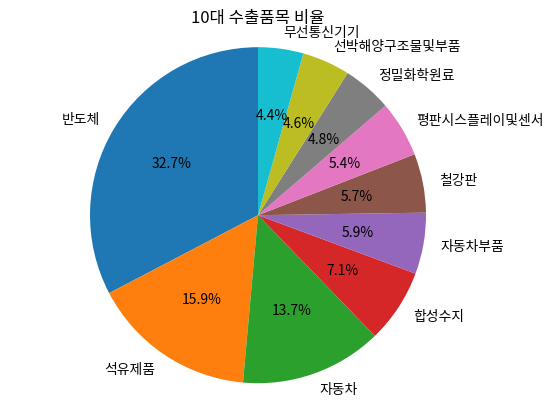

In [3]:
# 주어진 데이터
data = [
    ("반도체", 129229),
    ("석유제품", 62875),
    ("자동차", 54067),
    ("합성수지", 28078),
    ("자동차부품", 23316),
    ("철강판", 22401),
    ("평판시스플레이및센서", 21299),
    ("정밀화학원료", 18799),
    ("선박해양구조물및부품", 18178),
    ("무선통신기기", 17231)
]

# 금액을 숫자로 변환하고 총 금액 계산
total_amount = sum(amount for _, amount in data)
data = [(item, amount, amount / total_amount * 100) for item, amount in data]

# 원형 그래프 그리기
labels = [item for item, _, _ in data]
sizes = [percent for _, _, percent in data]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("10대 수출품목 비율")
plt.show()

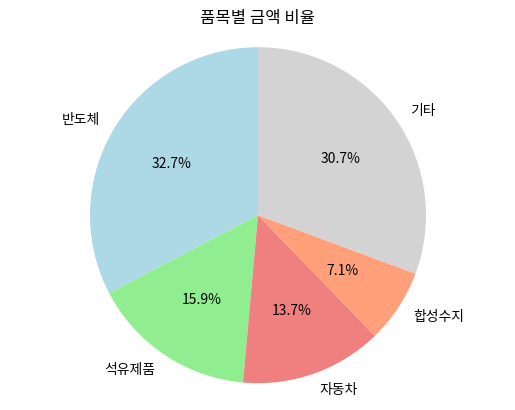

In [5]:
# 주어진 데이터
data = [
    ("반도체", 129229),
    ("석유제품", 62875),
    ("자동차", 54067),
    ("합성수지", 28078),
    ("자동차부품", 23316),
    ("철강판", 22401),
    ("평판시스플레이및센서", 21299),
    ("정밀화학원료", 18799),
    ("선박해양구조물및부품", 18178),
    ("무선통신기기", 17231)
]

# 금액을 숫자로 변환하고 총 금액 계산
total_amount = sum(amount for _, amount in data)
data = [(item, amount) for item, amount in data]

# 금액을 기준으로 내림차순으로 정렬
data.sort(key=lambda x: x[1], reverse=True)

# 상위 4위까지의 항목은 개별로, 나머지 항목은 "기타"로 묶음
top_items = data[:4]
other_items = [("기타", sum(amount for _, amount in data[4:]))]

# 데이터 합치기
merged_data = top_items + other_items

# 원형 그래프 그리기
labels = [item for item, _ in merged_data]
sizes = [amount for _, amount in merged_data]

colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightgray']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("품목별 금액 비율")
plt.show()